In [1]:
import pandas as pd
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

data, meta = arff.loadarff(r'C:\Users\gzmce\OneDrive - Firat University\Masaüstü\artificalGerekli\cluto-t5-8k.arff')
df = pd.DataFrame(data)
df


,x,y,CLASS
0,121.561996,81.001999,b'0'
1,762.096985,70.461998,b'1'
2,127.569000,113.457001,b'0'
3,95.467003,116.822998,b'0'
4,652.234009,60.743000,b'2'
...,...,...,...
7995,728.572998,40.826000,b'1'
7996,452.121002,52.111000,b'4'
7997,485.912994,63.375999,b'noise'
7998,241.496994,121.903000,b'5'


In [10]:
pd.DataFrame(data)["CLASS"].value_counts()

CLASS
b'4'        1206
b'2'        1198
b'0'        1173
b'3'        1163
b'noise'    1153
b'5'        1054
b'1'        1053
Name: count, dtype: int64

In [25]:
y_true = df['CLASS'].values
y_true

array([b'0', b'1', b'0', ..., b'noise', b'5', b'noise'], dtype=object)

In [18]:
pd.DataFrame(data).value_counts()

x           y           CLASS   
14.758000   138.477005  b'noise'    1
527.648010  24.177000   b'noise'    1
532.171021  138.761002  b'noise'    1
531.869019  45.033001   b'noise'    1
531.431030  101.117996  b'noise'    1
                                   ..
304.944000  70.146004   b'3'        1
304.919006  112.832001  b'noise'    1
304.917999  87.266998   b'3'        1
304.824005  84.330002   b'3'        1
803.338013  31.507000   b'noise'    1
Name: count, Length: 8000, dtype: int64

In [19]:
df.columns

Index(['x', 'y', 'CLASS'], dtype='object')

In [20]:
from sklearn.preprocessing import StandardScaler

# Sayısal verileri al
X = np.column_stack((data['x'], data['y']))

# Standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
data_pd = pd.DataFrame(data)

In [22]:
data_pd["CLASS"] = data_pd["CLASS"].apply(lambda c : c.decode("utf-8"))

In [27]:
data_pd["CLASS"] = data_pd["CLASS"].apply(lambda c : int(c) if c != 'noise' else -1)

In [28]:
data_pd #classları sayısal yaptık.

,x,y,CLASS
0,121.561996,81.001999,0
1,762.096985,70.461998,1
2,127.569000,113.457001,0
3,95.467003,116.822998,0
4,652.234009,60.743000,2
...,...,...,...
7995,728.572998,40.826000,1
7996,452.121002,52.111000,4
7997,485.912994,63.375999,-1
7998,241.496994,121.903000,5


### k means clustering

In [35]:
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, [0, 1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [36]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(data_pd["CLASS"],y_kmeans) 


0.3722596444414516

In [37]:
import time

start = time.time()

kmeans = KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

end = time.time()
print(f"K-Means çalışma süresi: {end - start:.4f} saniye")

K-Means çalışma süresi: 0.0126 saniye


### Agglomerative Clustering

In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, [0, 1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=6)
labels_agg = agg.fit_predict(X_scaled)

In [39]:
normalized_mutual_info_score(data_pd["CLASS"],labels_agg) 


0.5087619473424833

In [40]:
import time

start = time.time()

agg = AgglomerativeClustering(n_clusters=6)
labels_agg = agg.fit_predict(X_scaled)

end = time.time()
print(f"Agglomerative çalışma süresi: {end - start:.4f} saniye")

Agglomerative çalışma süresi: 1.1731 saniye


### DBSCAN Clustering

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Kategorik sütunları decode et (gerekliyse)
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

# X ve Y özelliklerini al
X = df.iloc[:, [0, 1]].values

# Standardizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN modelini oluştur
dbscan = DBSCAN(eps=0.2, min_samples=100)
labels = dbscan.fit_predict(X_scaled)

In [42]:
normalized_mutual_info_score(data_pd["CLASS"],labels) 


0.48065389963187555

In [43]:
import time

start = time.time()

dbscan = DBSCAN(eps=0.2, min_samples=100)
labels = dbscan.fit_predict(X_scaled)

end = time.time()
print(f"dbscan çalışma süresi: {end - start:.4f} saniye")

dbscan çalışma süresi: 0.0562 saniye


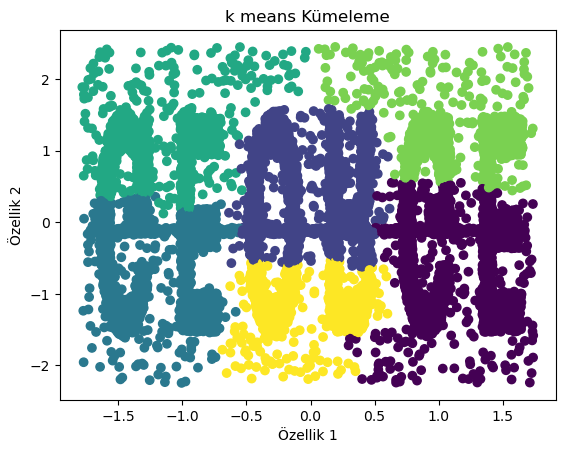

In [47]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='viridis')
plt.title('k means Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

In [45]:
import time
from sklearn.cluster import DBSCAN

start = time.time()
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X)
end = time.time()

print("Süre:", end - start)


Süre: 0.03199505805969238


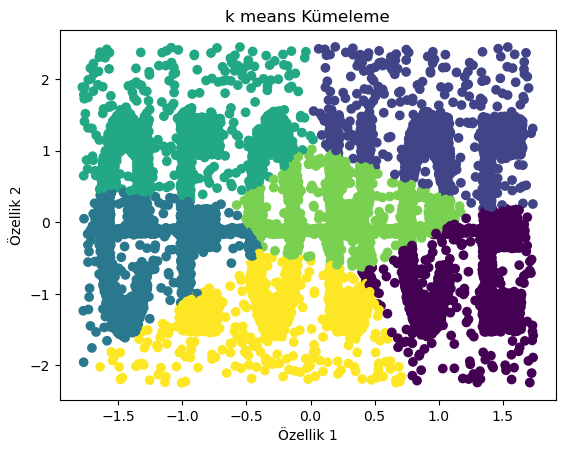

In [49]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.title('k means Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

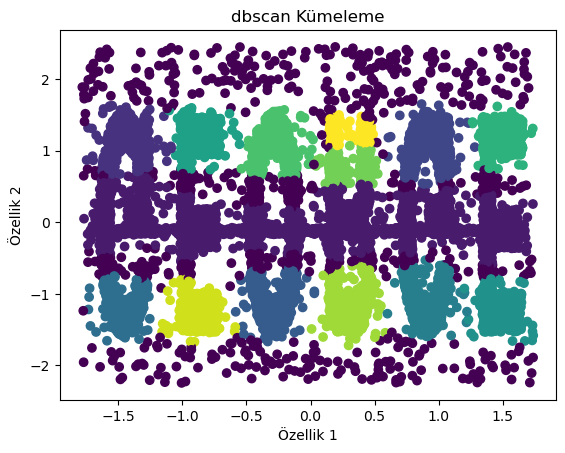

In [48]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('dbscan Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()